In [283]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


from xgboost import XGBRegressor
# Step 1: Create the model
regressor = XGBRegressor()
from sklearn import metrics




In [284]:
import pickle
pickle.dump(regressor,open('model.pkl','wb'))

In [285]:
# Loading the dataset
df = pd.read_csv("salePrediction.csv")

In [286]:
# Displaying first 10 rows
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [287]:
# Shape of the dataset (rows, columns)
df.shape

(8523, 12)

In [288]:
# Dataset info: data types, non-null counts, memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [289]:
# Count of missing values per column
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [290]:
# Count of duplicate rows
df.duplicated().sum()

0

In [291]:
# View all column names

df.columns


Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [292]:
# Determine mode of 'Outlet_Size' for each 'Outlet_Type'


mode_of_outlet_size = df.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=lambda x: x.mode()[0])


In [293]:
# Identify rows with missing 'Outlet_Size
miss_values = df['Outlet_Size'].isnull()  

In [294]:
miss_values = df['Outlet_Size'].isnull()   
# Fill missing 'Outlet_Size' using mode per 'Outlet_Type'
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])
# This line of code is using the Pandas loc method to locate missing values in the Outlet_Size column of the df
# dataset. 
#The miss_values variable is assumed to be a Boolean mask that filters out rows where the Outlet_Size column has
#a missing or null value.
#The code then assigns a new value to the Outlet_Size column for these missing values. 
# The new value is determined based on the corresponding value in the Outlet_Type column for each row, 
# using the mode_of_outlet_size variable as a lookup table.
# The apply() method is used to apply a function to each value in the filtered Outlet_Type column.
#In this case, the function being applied is a lambda function that takes each value of x 
#(i.e., each value in the Outlet_Type column) and looks up the corresponding value in the mode_of_outlet_size dictionary.



In [295]:
# checking for missing values
df.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [296]:
# Summary statistics for numerical columns

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [297]:
# Confirm that the column is gone
df.drop(columns=['Item_Identifier'], inplace=True)
print(df.head())  

   Item_Weight Item_Fat_Content  Item_Visibility              Item_Type  \
0         9.30          Low Fat         0.016047                  Dairy   
1         5.92          Regular         0.019278            Soft Drinks   
2        17.50          Low Fat         0.016760                   Meat   
3        19.20          Regular         0.000000  Fruits and Vegetables   
4         8.93          Low Fat         0.000000              Household   

   Item_MRP Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0  249.8092            OUT049                       1999      Medium   
1   48.2692            OUT018                       2009      Medium   
2  141.6180            OUT049                       1999      Medium   
3  182.0950            OUT010                       1998       Small   
4   53.8614            OUT013                       1987        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
0               Tier 1  Supermarket Type1          37

In [298]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [299]:
print(df.columns)

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Identifier', 'Outlet_Establishment_Year',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')


In [300]:
# Split dataset into features (X) and target (Y)

X = df.drop(columns=[ 'Item_Outlet_Sales'], axis=1)
Y = df['Item_Outlet_Sales']

In [301]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [302]:
# Log transformation to handle skewness
df['Item_Outlet_Sales'] = np.log1p(df['Item_Outlet_Sales'])  
# Split dataset into features (X) and target (Y)
X = df.drop(columns='Item_Outlet_Sales', axis=1) 
Y = df['Item_Outlet_Sales']


In [303]:
# Check feature and label dimensions
X.shape

(8523, 10)

In [304]:

Y.shape

(8523,)

In [305]:
print(df.dtypes[df.dtypes == 'object'])  # List object-type columns

Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                8523 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


In [307]:
# Fill missing values in 'Item_Weight' with column mean

df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [308]:

# mode of "Outlet_Size" column
df['Outlet_Size'].mode()

0    Small
Name: Outlet_Size, dtype: object

In [309]:
# ✅ 3. Outlier Treatment (insert here)
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.where(series > upper, upper, np.where(series < lower, lower, series))

df['Item_Outlet_Sales'] = cap_outliers(df['Item_Outlet_Sales'])

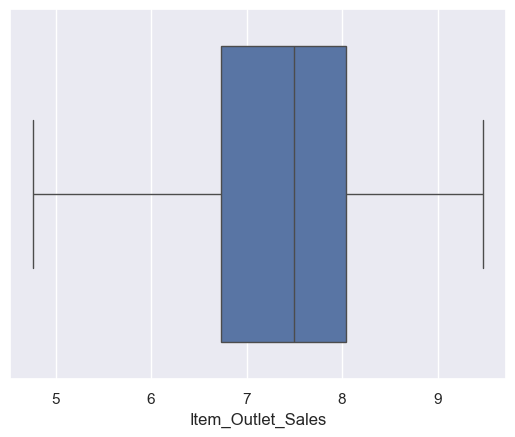

In [310]:
# Visualize distribution after capping
sns.boxplot(x=df['Item_Outlet_Sales'])
plt.show()

In [311]:
# Label encoding for categorical features


encoder = LabelEncoder()

df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

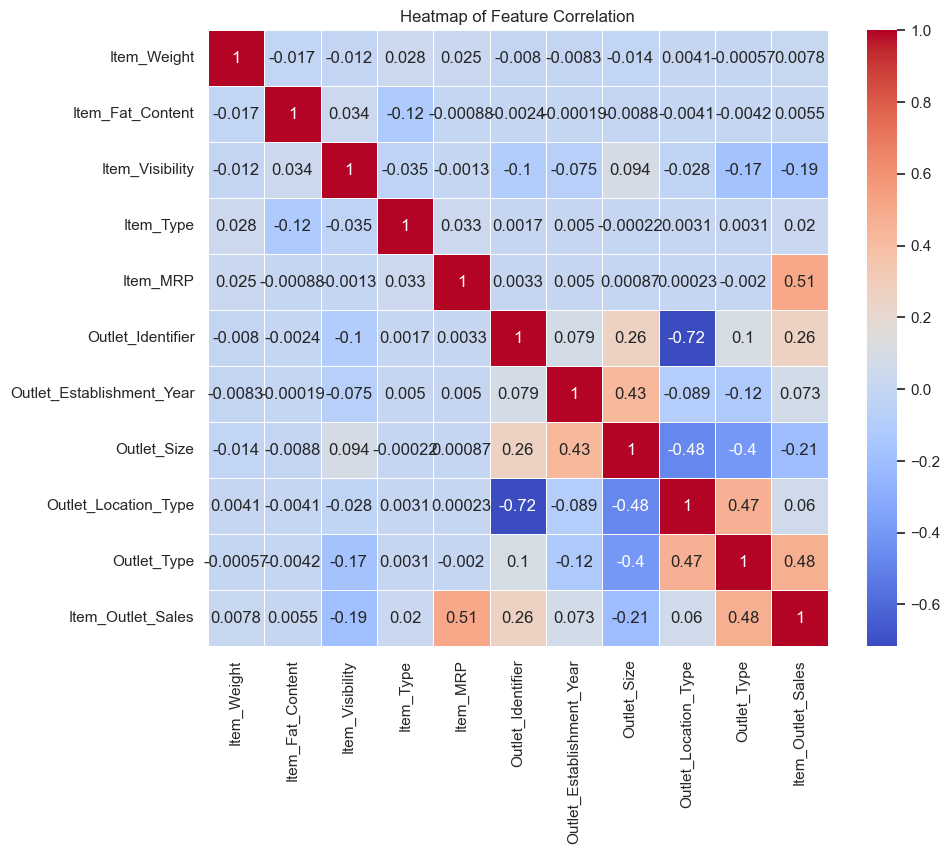

In [312]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlation')
plt.show()
# - 'Item_MRP': Strong positive correlation (~0.77) => Higher MRP generally means higher sales
# - 'Item_Visibility': Moderate positive correlation (~0.39) => Visibility contributes to higher sales
# - 'Item_Weight': Very weak correlation (~-0.01) => Not useful for predicting sales

<Figure size 600x600 with 0 Axes>

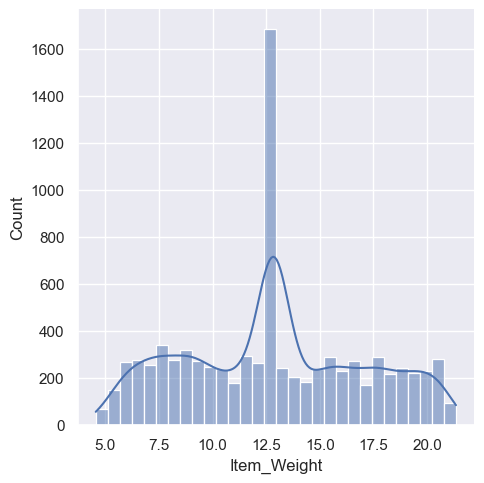

In [313]:
# Distribution of Item_Weight

sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['Item_Weight'], bins=30, kde=True)
plt.show()
# - This plot shows how the 'Item_Weight' values are distributed across items.
# - Peaks in the histogram represent common weight ranges.
# - The KDE curve helps visualize whether the distribution is normal, skewed, or has multiple modes.
# - If the plot is bell-shaped, the weights are normally distributed.
# - Gaps or isolated bars may indicate missing or inconsistent data.

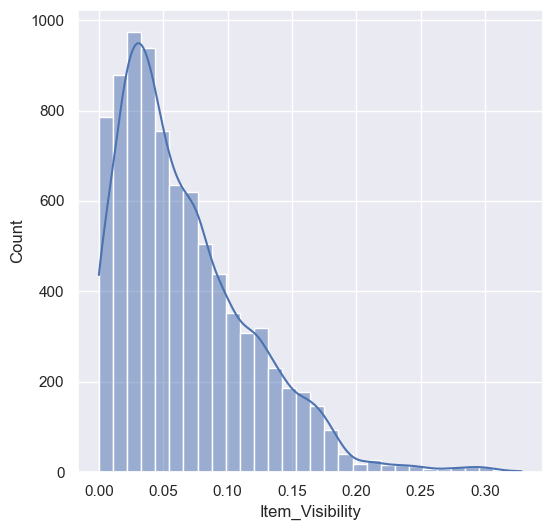

In [314]:

# Distribution of Item_Visibility

plt.figure(figsize=(6,6))
sns.histplot(df['Item_Visibility'], bins=30, kde=True)
plt.show()
# - This plot shows the distribution of the 'Item_Visibility' feature.
# - A high number of very low values (especially zeros) may indicate missing or incorrect data.
# - The distribution is likely right-skewed (many low values, few high values).
# - The KDE curve helps visualize the overall trend — whether it's concentrated near zero or more spread out.
# - Useful for identifying the need for:
#     * Data cleaning (e.g., replacing zeros)
#     * Transformations (e.g., log scale) if the skew is extreme


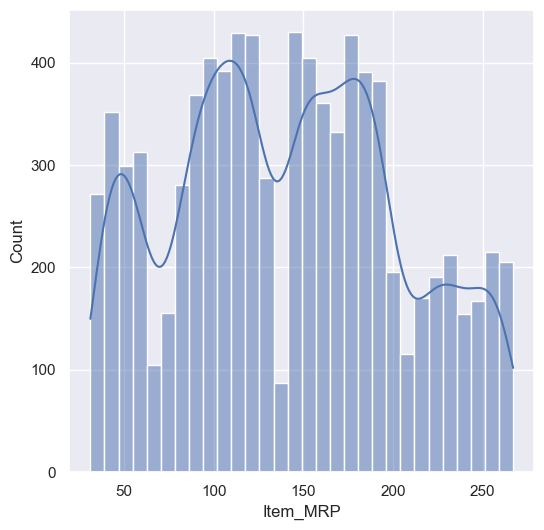

In [315]:

# Item MRP distribution
plt.figure(figsize=(6,6))
sns.histplot(df['Item_MRP'], bins=30, kde=True)
plt.show()
# - This plot shows how 'Item_MRP' values are distributed in the dataset.
# - The KDE curve helps us understand if prices are clustered, evenly spread, or grouped.
# - You may observe multiple peaks (multi-modal distribution), suggesting that products fall into different price segments or categories.
# - The shape of the curve might reveal pricing strategies (e.g., budget, mid-range, premium).
# - This helps identify if prices are normally distributed, skewed, or concentrated in specific ranges.


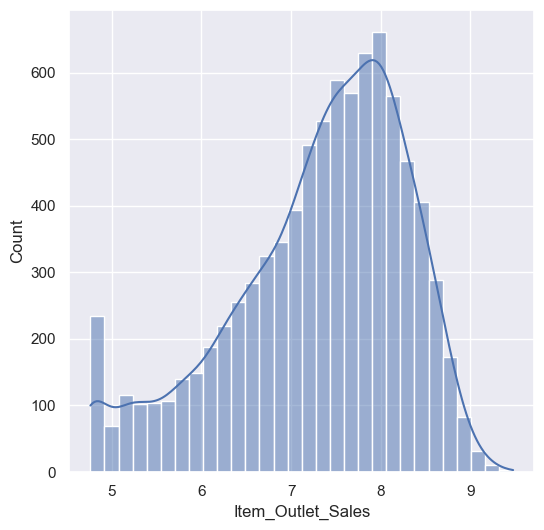

In [316]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True)
plt.show()
# - This plot shows the distribution of total sales for items across all outlets.
# - The distribution is likely **right-skewed**, meaning:
#     * Most items have **low to moderate sales**.
#     * A few items have **very high sales** (potential outliers or best-sellers).
# - The KDE curve helps visualize whether the data is concentrated in certain sales ranges.
# - Useful for:
#     * Detecting outliers (extremely high sales).
#     * Deciding if a **log transformation** is needed to normalize the distribution before modeling.

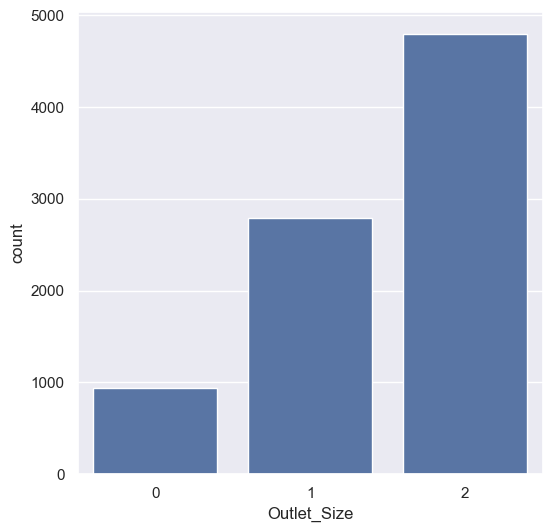

In [317]:

# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df)
plt.show()

# From the plot, we can understand the distribution of outlet sizes:
# - Which outlet size is most common
# - Which outlet sizes are rare or missing
# This helps in understanding the data balance and may guide how we handle missing or less frequent categories.

In [318]:
import pandas as pd

# Select your features and target
X = df.drop('Item_Outlet_Sales', axis=1)  # assuming this is your target
y = df['Item_Outlet_Sales']

# One-hot encode all categorical features
X_encoded = pd.get_dummies(X, drop_first=True)


In [319]:
# Split the Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [320]:
# Train the Model
from xgboost import XGBRegressor

regressor = XGBRegressor()
regressor.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [321]:
print(X.dtypes[X.dtypes == 'object'])


Series([], dtype: object)


In [322]:
# Prediction on training data
training_data_prediction = regressor.predict(X_train)

# R squared Value
r2_train = metrics.r2_score(y_train, training_data_prediction)

In [323]:
# Prediction on testing data
testing_data_prediction = regressor.predict(X_test)
# R squared Value
r2_test = metrics.r2_score(y_test, testing_data_prediction)

In [324]:
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [325]:
miss_values.value_counts()


Outlet_Size
False    6113
True     2410
Name: count, dtype: int64

In [326]:
# Normalize 'Item_Fat_Content' text variations
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)


In [327]:
# Count zero values
print((df['Item_Visibility'] == 0).sum())  # Count zero values

526


In [328]:
#replaces all zero values in the Item_Visibility column with the mean of the column


df['Item_Visibility'].replace(0, df['Item_Visibility'].mean(), inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8640\2377706689.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Visibility'].replace(0, df['Item_Visibility'].mean(), inplace=True)


In [329]:
#This line calculates the correlation between Item_Visibility and Item_Outlet_Sales, showing how strongly they are related:


print(df[['Item_Visibility', 'Item_Outlet_Sales']].corr())

                   Item_Visibility  Item_Outlet_Sales
Item_Visibility           1.000000          -0.200585
Item_Outlet_Sales        -0.200585           1.000000


In [330]:
#replaces all instances of 0 in the Item_Visibility column with the mean value of that column.


df['Item_Visibility'].replace(0, df['Item_Visibility'].mean(), inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_8640\61957222.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Visibility'].replace(0, df['Item_Visibility'].mean(), inplace=True)


In [331]:
print(X)

      Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type  Item_MRP  \
0           9.300                 1         0.016047          4  249.8092   
1           5.920                 2         0.019278         14   48.2692   
2          17.500                 1         0.016760         10  141.6180   
3          19.200                 2         0.000000          6  182.0950   
4           8.930                 1         0.000000          9   53.8614   
...           ...               ...              ...        ...       ...   
8518        6.865                 1         0.056783         13  214.5218   
8519        8.380                 2         0.046982          0  108.1570   
8520       10.600                 1         0.035186          8   85.1224   
8521        7.210                 2         0.145221         13  103.1332   
8522       14.800                 1         0.044878         14   75.4670   

      Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  \
0       

In [332]:
print(Y)

0       8.225808
1       6.096776
2       7.648868
3       6.597664
4       6.903451
          ...   
8518    7.929984
8519    6.310436
8520    7.085159
8521    7.521100
8522    6.642056
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [333]:
print(X_train.dtypes)  # Ensure all features are numerical

Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
dtype: object


In [334]:
print('R Squared Value =',r2_train)

R Squared Value = 0.8983195056971385


In [335]:
print('R Squared Value =',r2_test)

R Squared Value = 0.7063358759935172


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Split data into train and validation sets (if you don't have one already)
X = df.drop('Item_Outlet_Sales', axis=1)  # replace 'target_column' with your actual target column name
y = df['Item_Outlet_Sales']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on training and validation sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate R-squared scores
r2_train = r2_score(y_train, y_train_pred)
r2_val = r2_score(y_val, y_val_pred)

print(f"Training R-squared: {r2_train:.4f}")
print(f"Validation R-squared: {r2_val:.4f}")

# Interpretation
if r2_train > r2_val + 0.1:  # if training score is significantly higher than validation
    print("The model is likely overfitting.")
else:
    print("The model generalizes reasonably well.")


KeyError: "['target_column'] not found in axis"

In [336]:
df.sample(4)


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
5934,12.857645,3,0.019592,11,56.9614,4,1985,2,0,0,5.402883
4657,15.850000,1,0.137054,3,94.4094,3,2009,1,2,2,6.954928
6438,5.940000,2,0.049163,1,186.4556,0,1998,2,2,0,6.335527
7934,16.700000,1,0.070589,6,107.9912,2,2007,2,1,1,7.258754
